###  Objetivo: predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv

### 1. Configuración y librerías

In [128]:
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates

# visualización
import matplotlib.pyplot as plt
import seaborn as sns

# contruir y entrenar modelo
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score
import pickle
from pickle import dump

### 2. Carga y comprensión del dataset

In [129]:
archivo = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
df = pd.read_csv(archivo, sep=",")

In [130]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [131]:
df.shape

(768, 9)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [133]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 3. Limpieza de datos

In [134]:
# Valores duplicados
duplicados = df[df.duplicated(keep=False)]
print(duplicados)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [135]:
# Valores nulos

df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 4. Análisis univariante

In [136]:
# Creo una función que me detecte automáticamente el tipo de columnas del dataset en un datafame.

def get_column_types(df):
    col_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    col_cat = df.select_dtypes(include=['object', 'category']).columns.tolist()
    return col_num, col_cat

col_num, col_cat = get_column_types(df)

print(f"Columnas numéricas ({len(col_num)}): {col_num}")
print(f"Columnas categóricas ({len(col_cat)}): {col_cat}")

Columnas numéricas (9): ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Columnas categóricas (0): []


In [137]:
# Analizo las variantes numéricas

df.describe().T #para detectar posibles valores extremos a simple vista

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Veo posibles problemas en Glucose, BloodPressure, Skinthickness, BMI e Insulin ya que existen muchos valores 0, lo cual es fisiológicamente imposible. Puede haber errores de codificado o valores NaN

In [138]:
# Reemplazo por NaN esos valores y realizo otro describe().T
cols_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_zero] = df[cols_zero].replace(0, np.nan)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Pregnancies sigue teniendo valores cero puesto que es un resultado dentro de los valores esperables. El resto de columnas dan resultados más realistas

In [139]:
def detectar_outliers_iqr(df, col_num):
    outliers = {}
    for col in col_num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outlier_count = df[(df[col] < lower) | (df[col] > upper)][col].count()
        outlier_pct = round(outlier_count / df.shape[0] * 100, 2)
        
        outliers[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Outliers (%)': outlier_pct
        }

    return pd.DataFrame(outliers).T.sort_values('Outliers (%)', ascending=False)

### 5. Visualización de las variantes numéricas entorno al target (outcome)

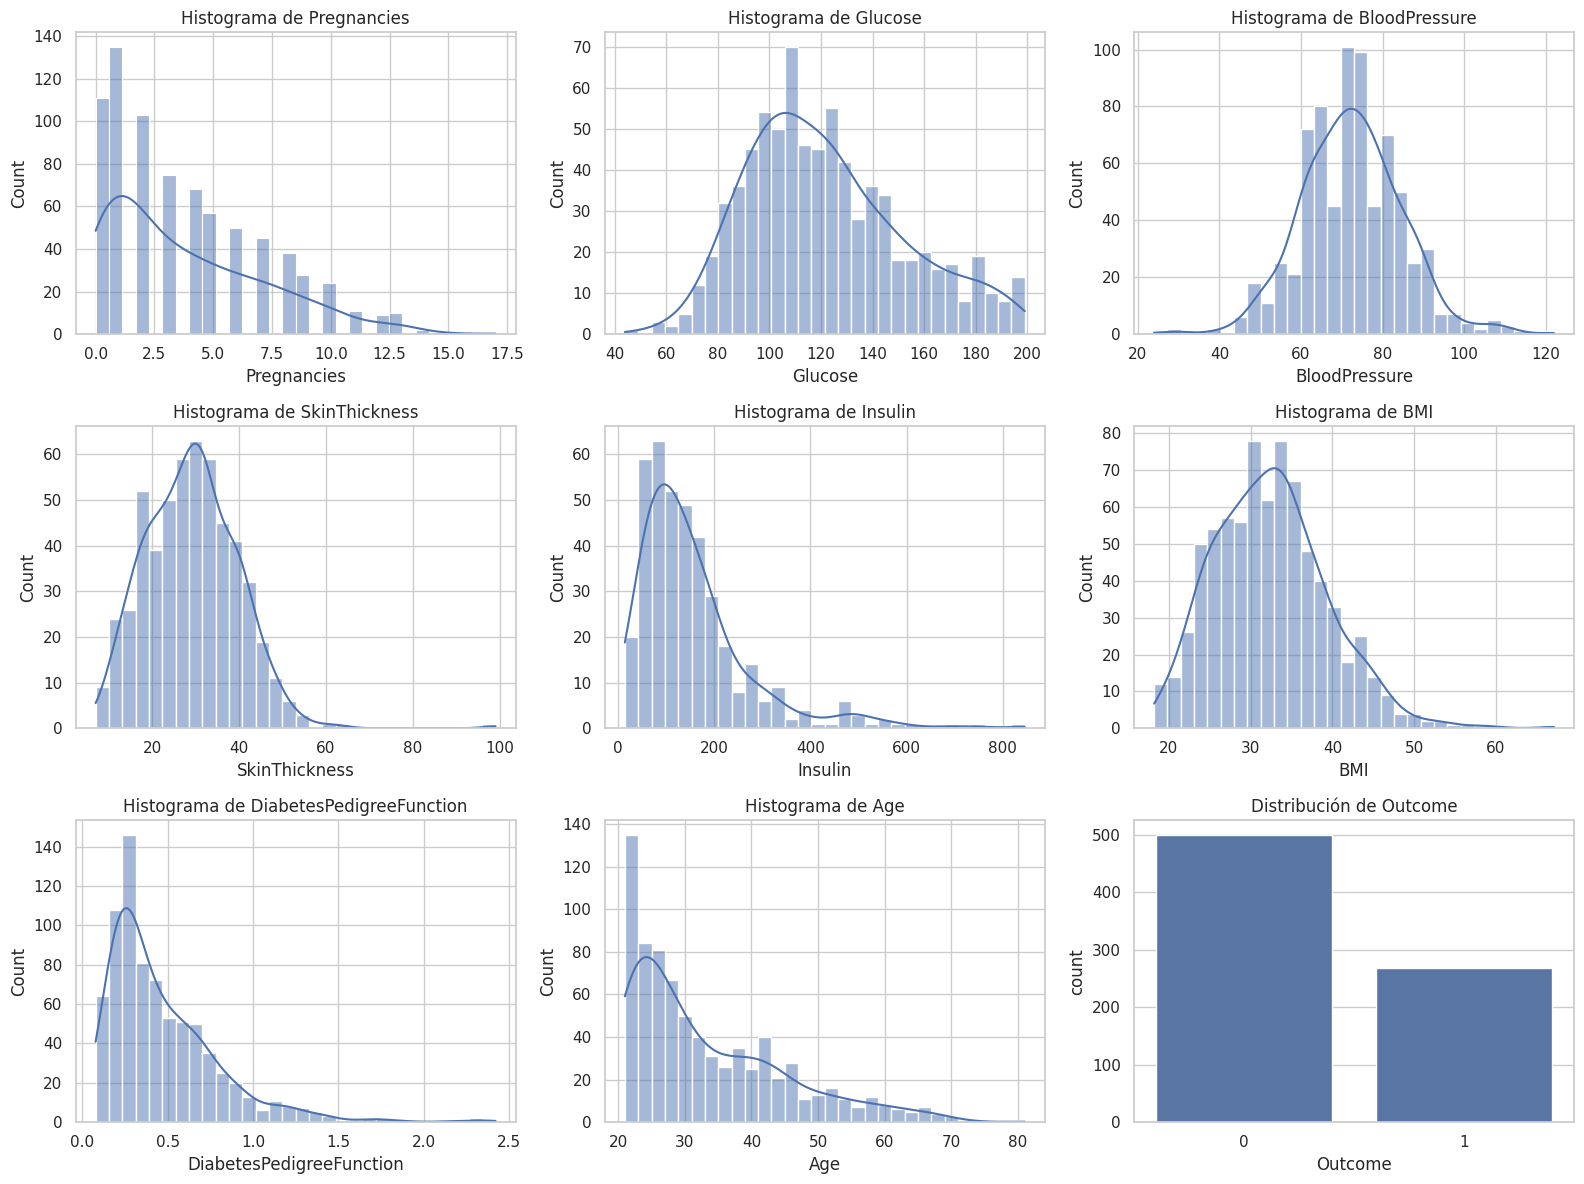

In [140]:
sns.set_theme(style="whitegrid")

# Separar features y target
features = [c for c in col_num if c != "Outcome"]
target = "Outcome"

# Eliminar filas con NaN en las columnas críticas
df_vis = df.copy()

# Histograma + KDE de las variables numéricas
plt.figure(figsize=(16, 12))
for i, col in enumerate(features + [target], 1):
    plt.subplot(3, 3, i)
    if col == target:
        sns.countplot(x=col, data=df_vis)
        plt.title(f"Distribución de {col}")
    else:
        sns.histplot(df_vis[col], kde=True, bins=30)
        plt.title(f"Histograma de {col}")
    plt.tight_layout()
plt.show()

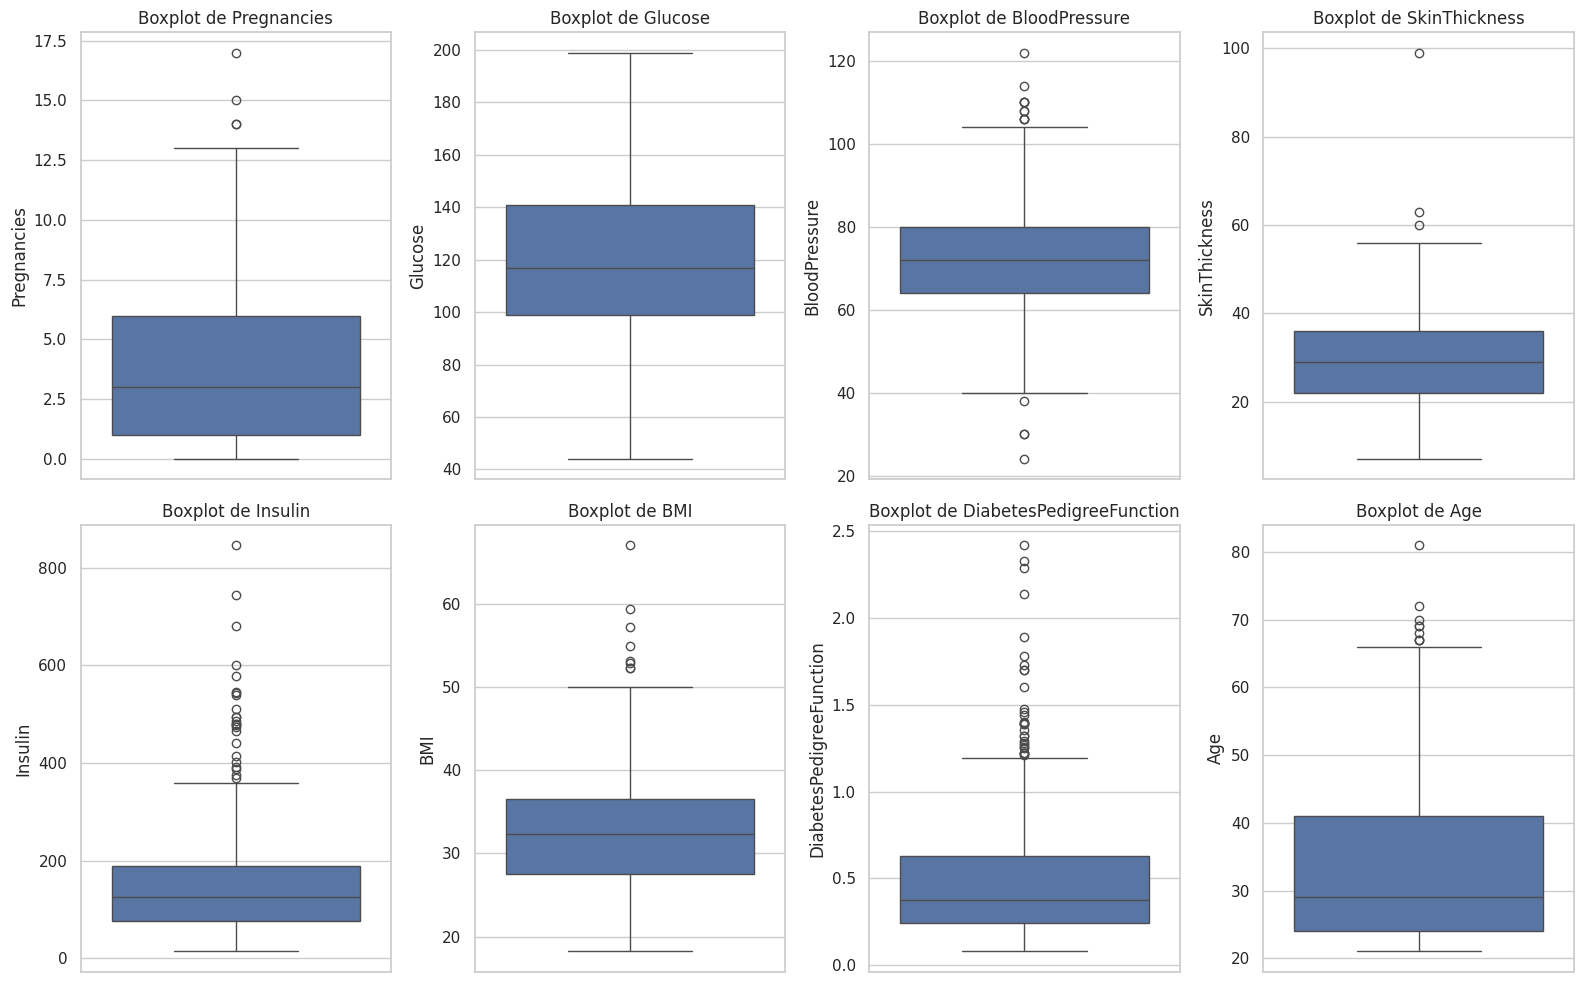

In [141]:
# Boxplots para detectar outliers de las features numéricas
plt.figure(figsize=(16, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_vis[col])
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()
plt.show()

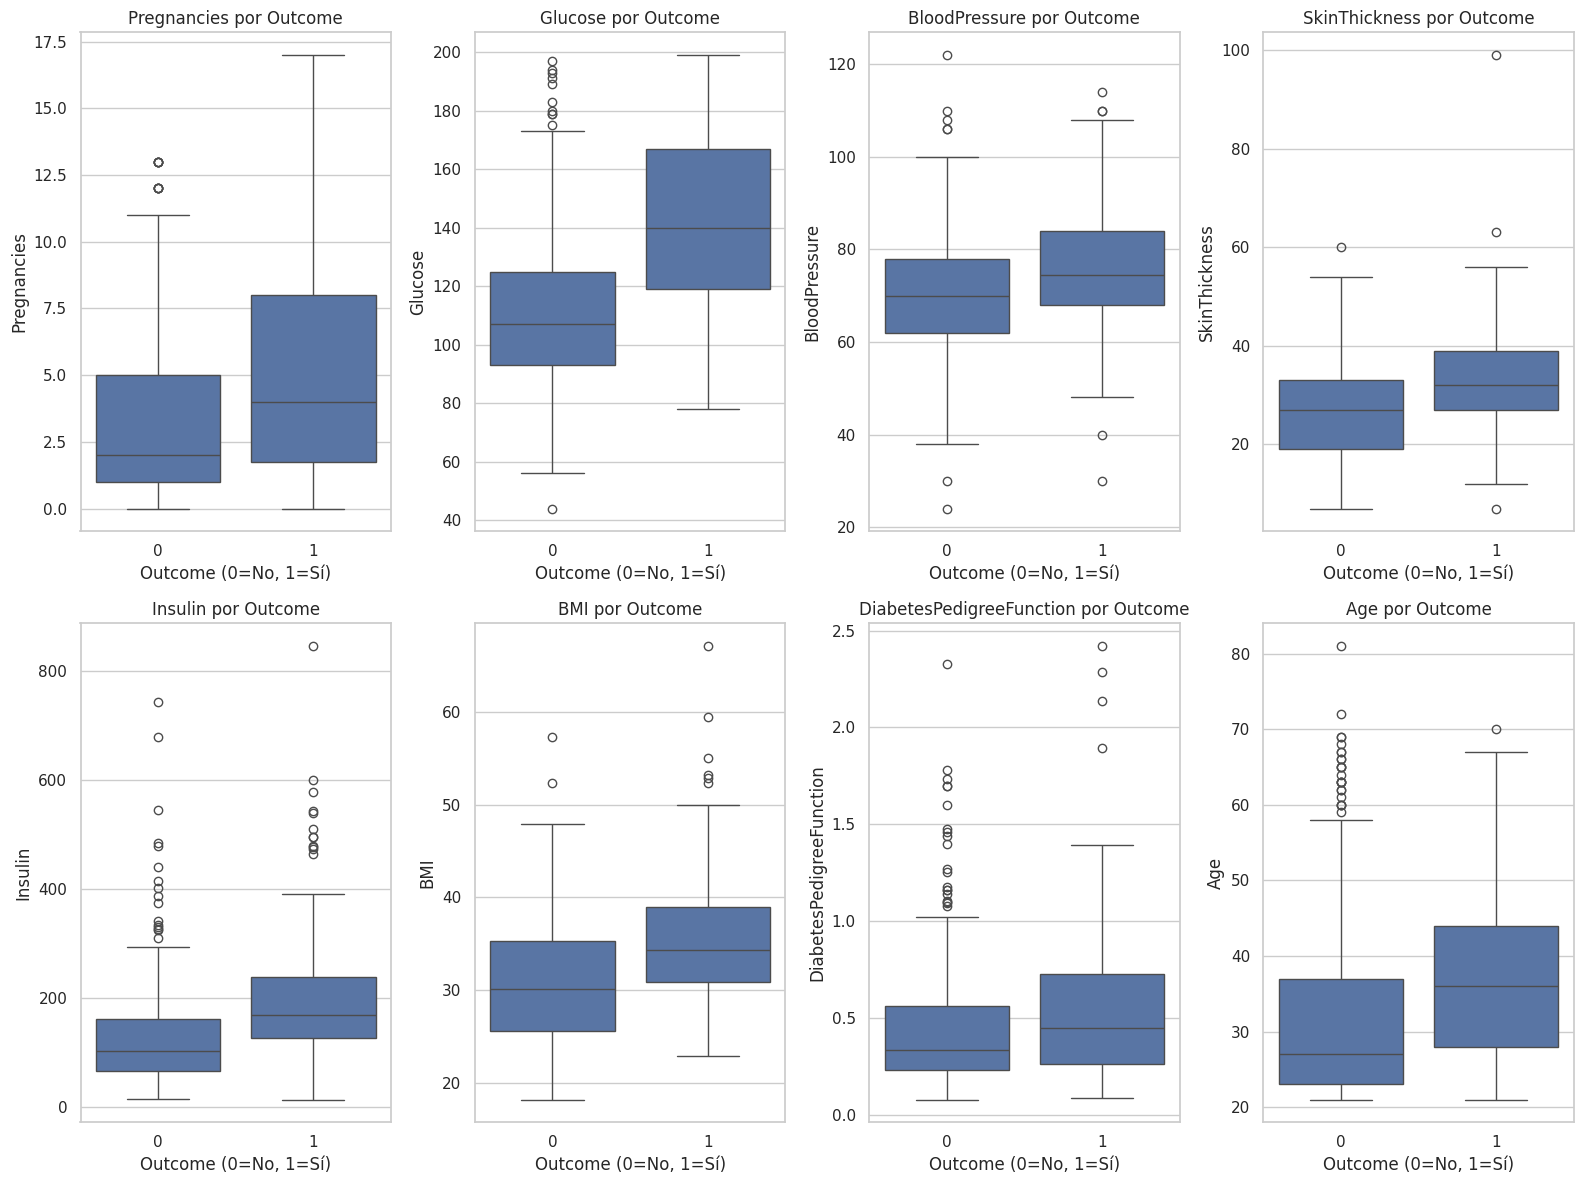

In [142]:
# Distribución de cada variable numérica segmentada por Outcome (0 = no diabetes, 1 = diabetes)
plt.figure(figsize=(16, 12))
for i, col in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=target, y=col, data=df_vis)
    plt.title(f"{col} por {target}")
    plt.xlabel("Outcome (0=No, 1=Sí)")
    plt.tight_layout()
plt.show()

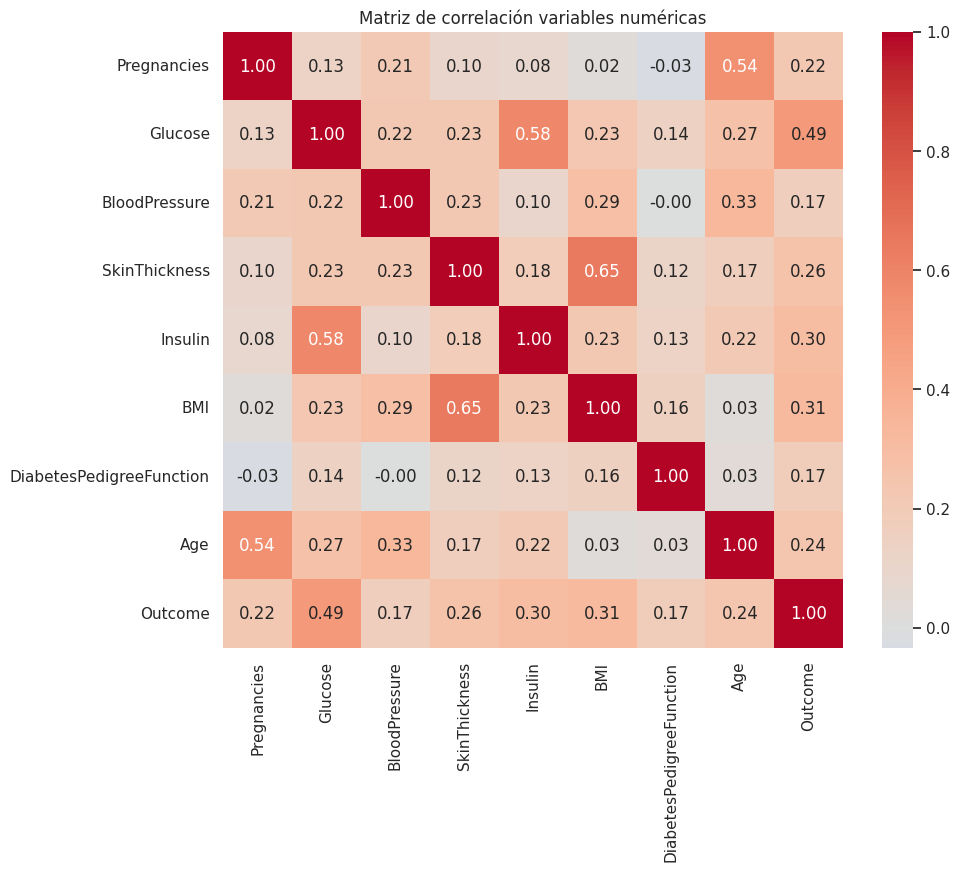

In [143]:
# Mapa de calor de correlaciones entre todas las variables numéricas
plt.figure(figsize=(10, 8))
corr = df_vis[col_num].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación variables numéricas")
plt.show()

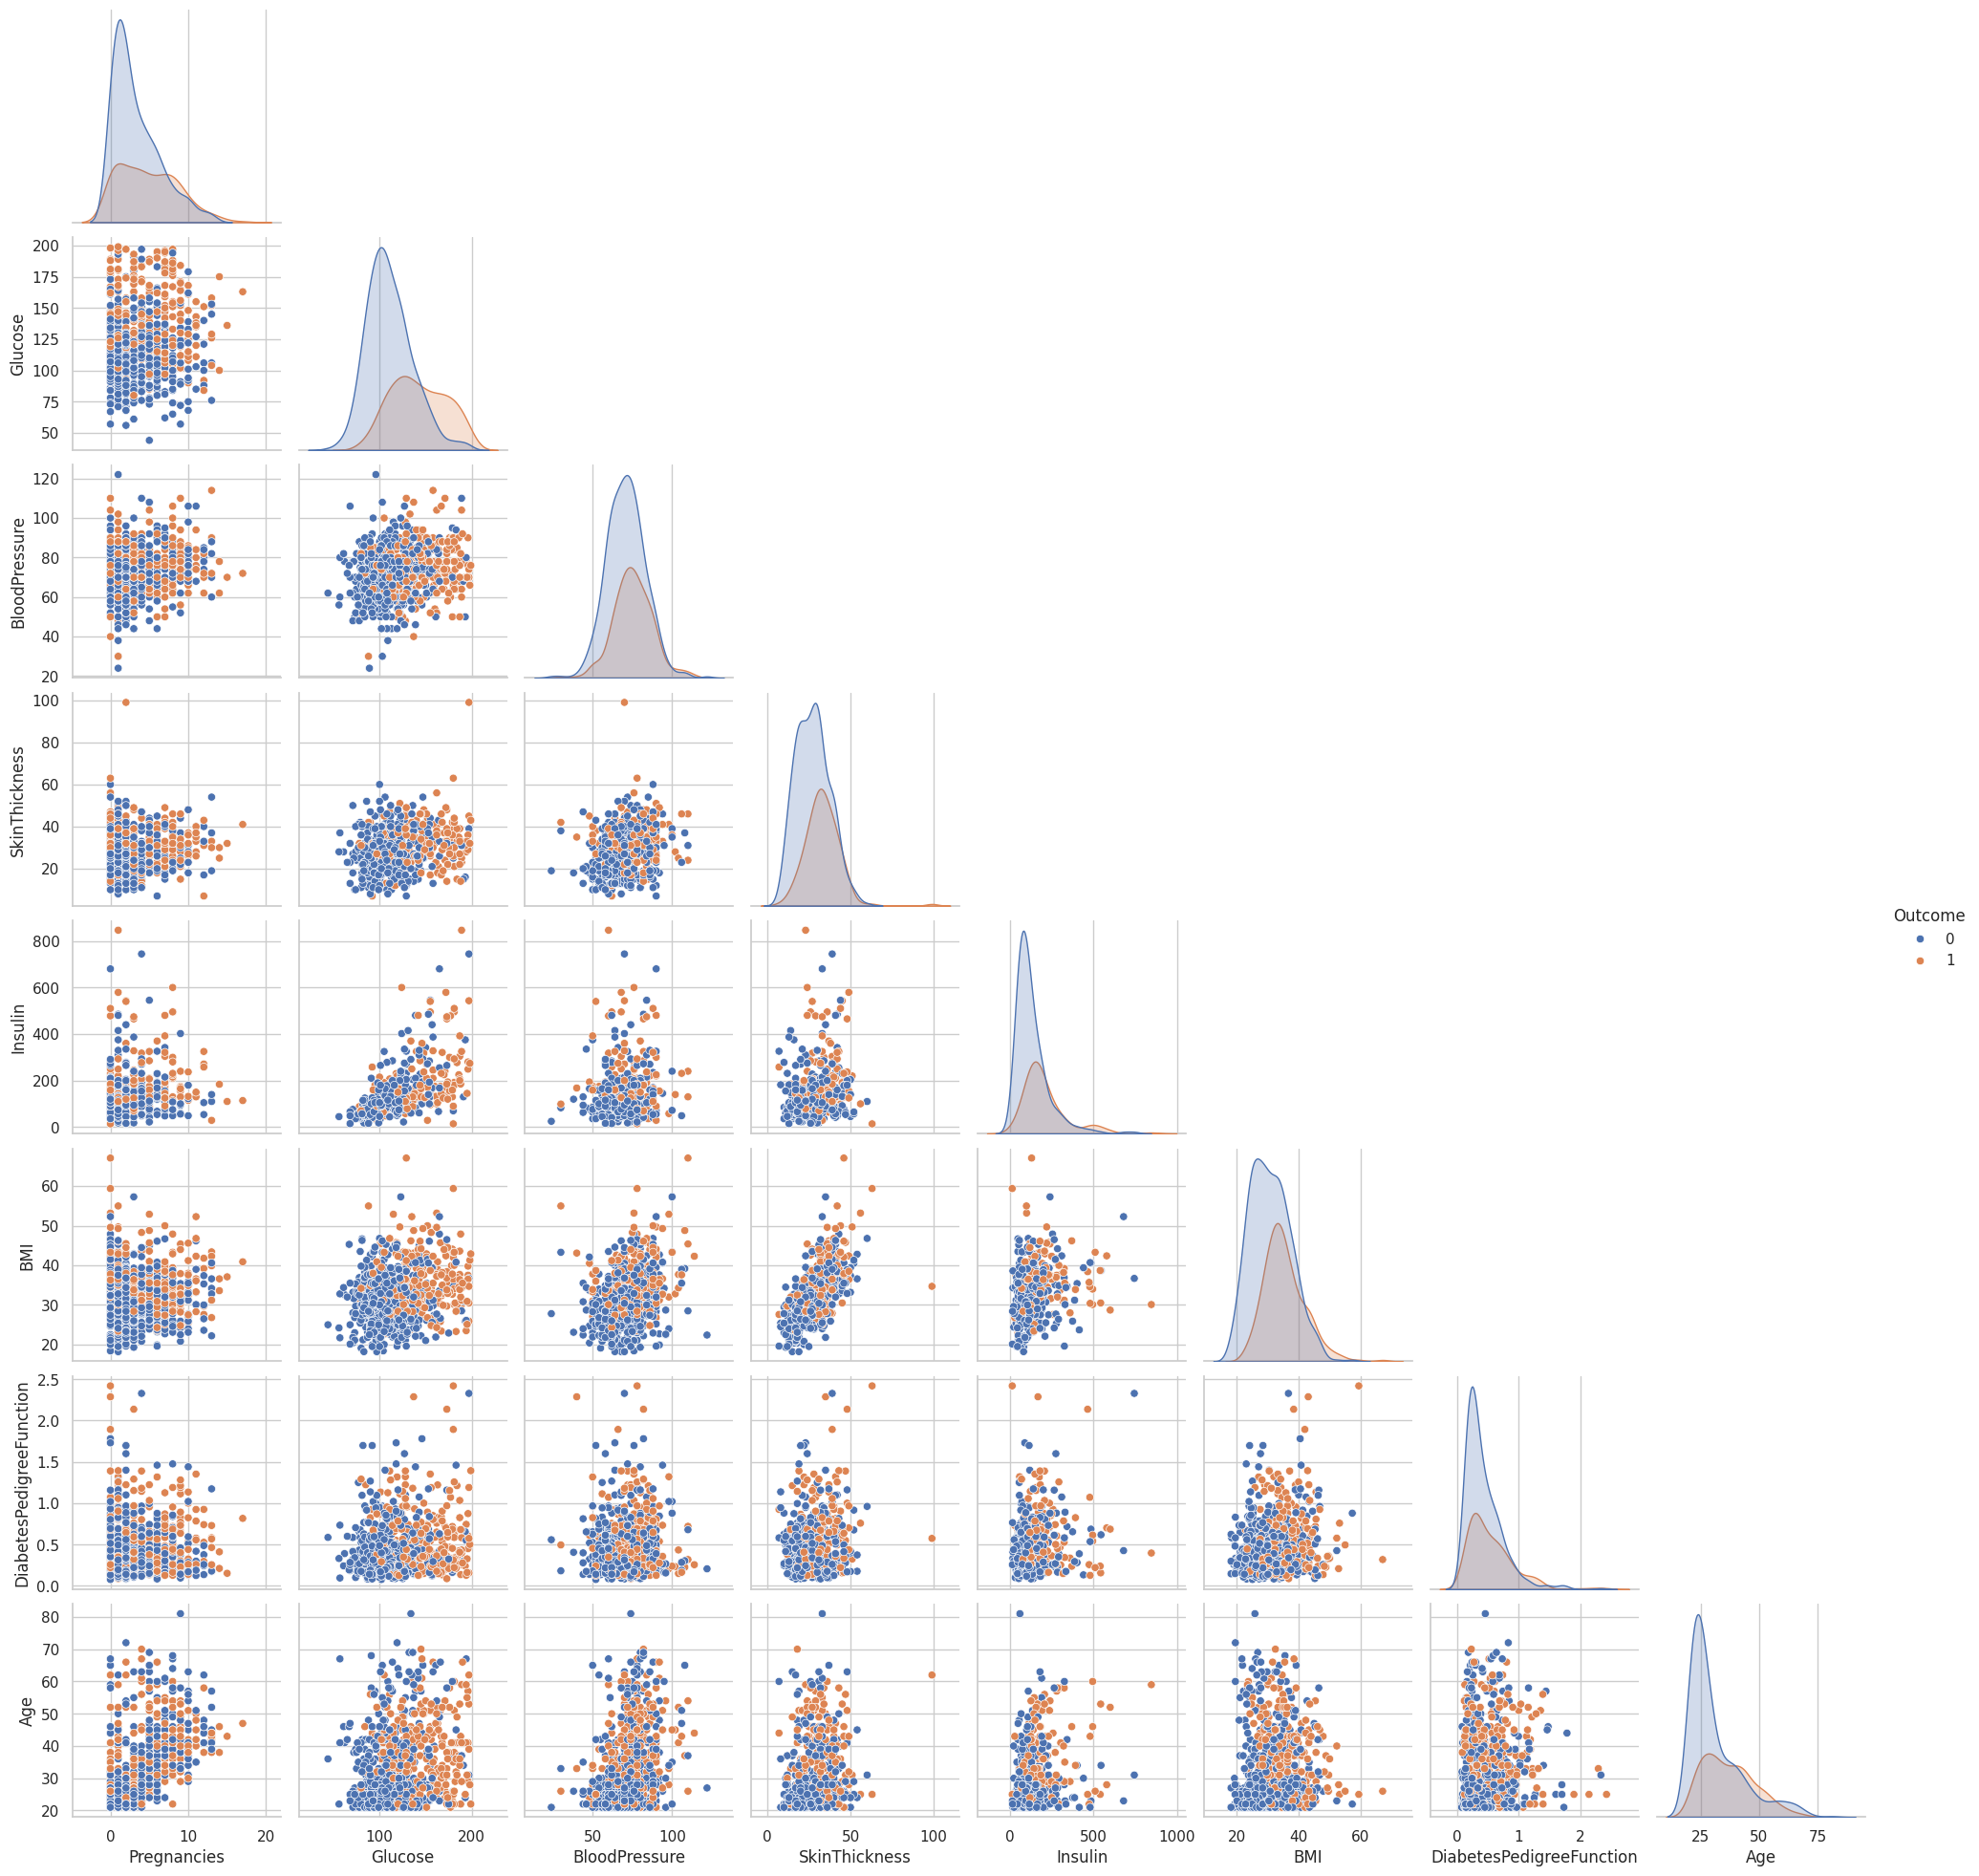

In [144]:
# relación entre variables y Outcome
subset_cols = features + [target]
sns.pairplot(df_vis[subset_cols], hue=target, diag_kind="kde", corner=True)
plt.show()

Las variables numéricas presentan distribuciones asimétricas, (Insulin, SkinThickness y BMI), lo que apunta a una fuerte presencia de valores extremos y a la necesidad de normalizar o transformar antes de modelar.
Glucose muestra una distribución más definida y centrada, lo que la convierte en una candidata natural como predictor relevante del diagnóstico.

Outliers: hay en casi todas las métricas excepto pregnacies y age.

Relación con outcome: hay tendencias consistentes:
 - los pacientes con diabetes presentan mayores valores de Glucose y BMI. También podemos añadir Insulin pero la dispersión de los datos reduce la visibilidad de la diferencia
 
 Mapa de calor: la matriz de correlación presenta una relación más fuerte entre Glucose y Outome, como era de esperar. Existen algunas relaciones más debiles entre BMI y Outcome y Age y Outcome.

 Conclusiones: Glucose, BMI, Age e Insulin son los predictores más informativos del Outcome. El comportamiento visual de las métricas concuerdan con los patrones clínicos reales.

### 5. Split del dataset en Train y Test

In [145]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# División para respetar el balance del target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Tamaños del split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Tamaños del split:
X_train: (614, 8)
X_test: (154, 8)
y_train: (614,)
y_test: (154,)


### 6. Árbol de decisión

In [146]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25
46,1,146.0,56.0,NaN,NaN,29.7,0.564,29
682,0,95.0,64.0,39.0,105.0,44.6,0.366,22


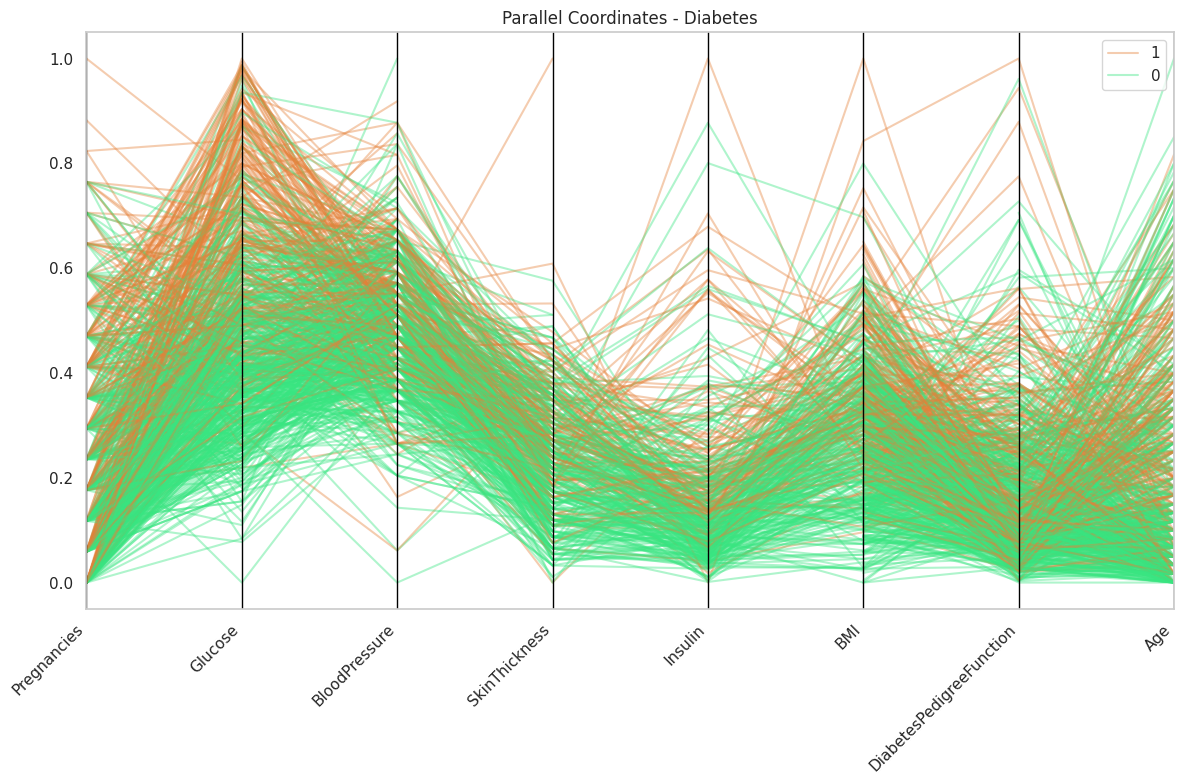

In [147]:
total_data = X.copy()
total_data["Outcome"] = y

scaler = MinMaxScaler()
total_data_scaled = total_data.copy()
total_data_scaled[X.columns] = scaler.fit_transform(X)

# Gráfico
plt.figure(figsize=(12, 8))  # más ancho para que no se solape

parallel_coordinates(
    total_data_scaled,
    "Outcome",
    color=["#E58139", "#39E581"],
    alpha=0.4,
    linewidth=1.5
)

plt.xticks(rotation=45, ha="right")   # rotación para que no se pisen
plt.title("Parallel Coordinates - Diabetes")
plt.tight_layout()
plt.show()

In [148]:
# modelo
model = DecisionTreeClassifier(random_state = 42, max_depth = 5)

# entrenamiento
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


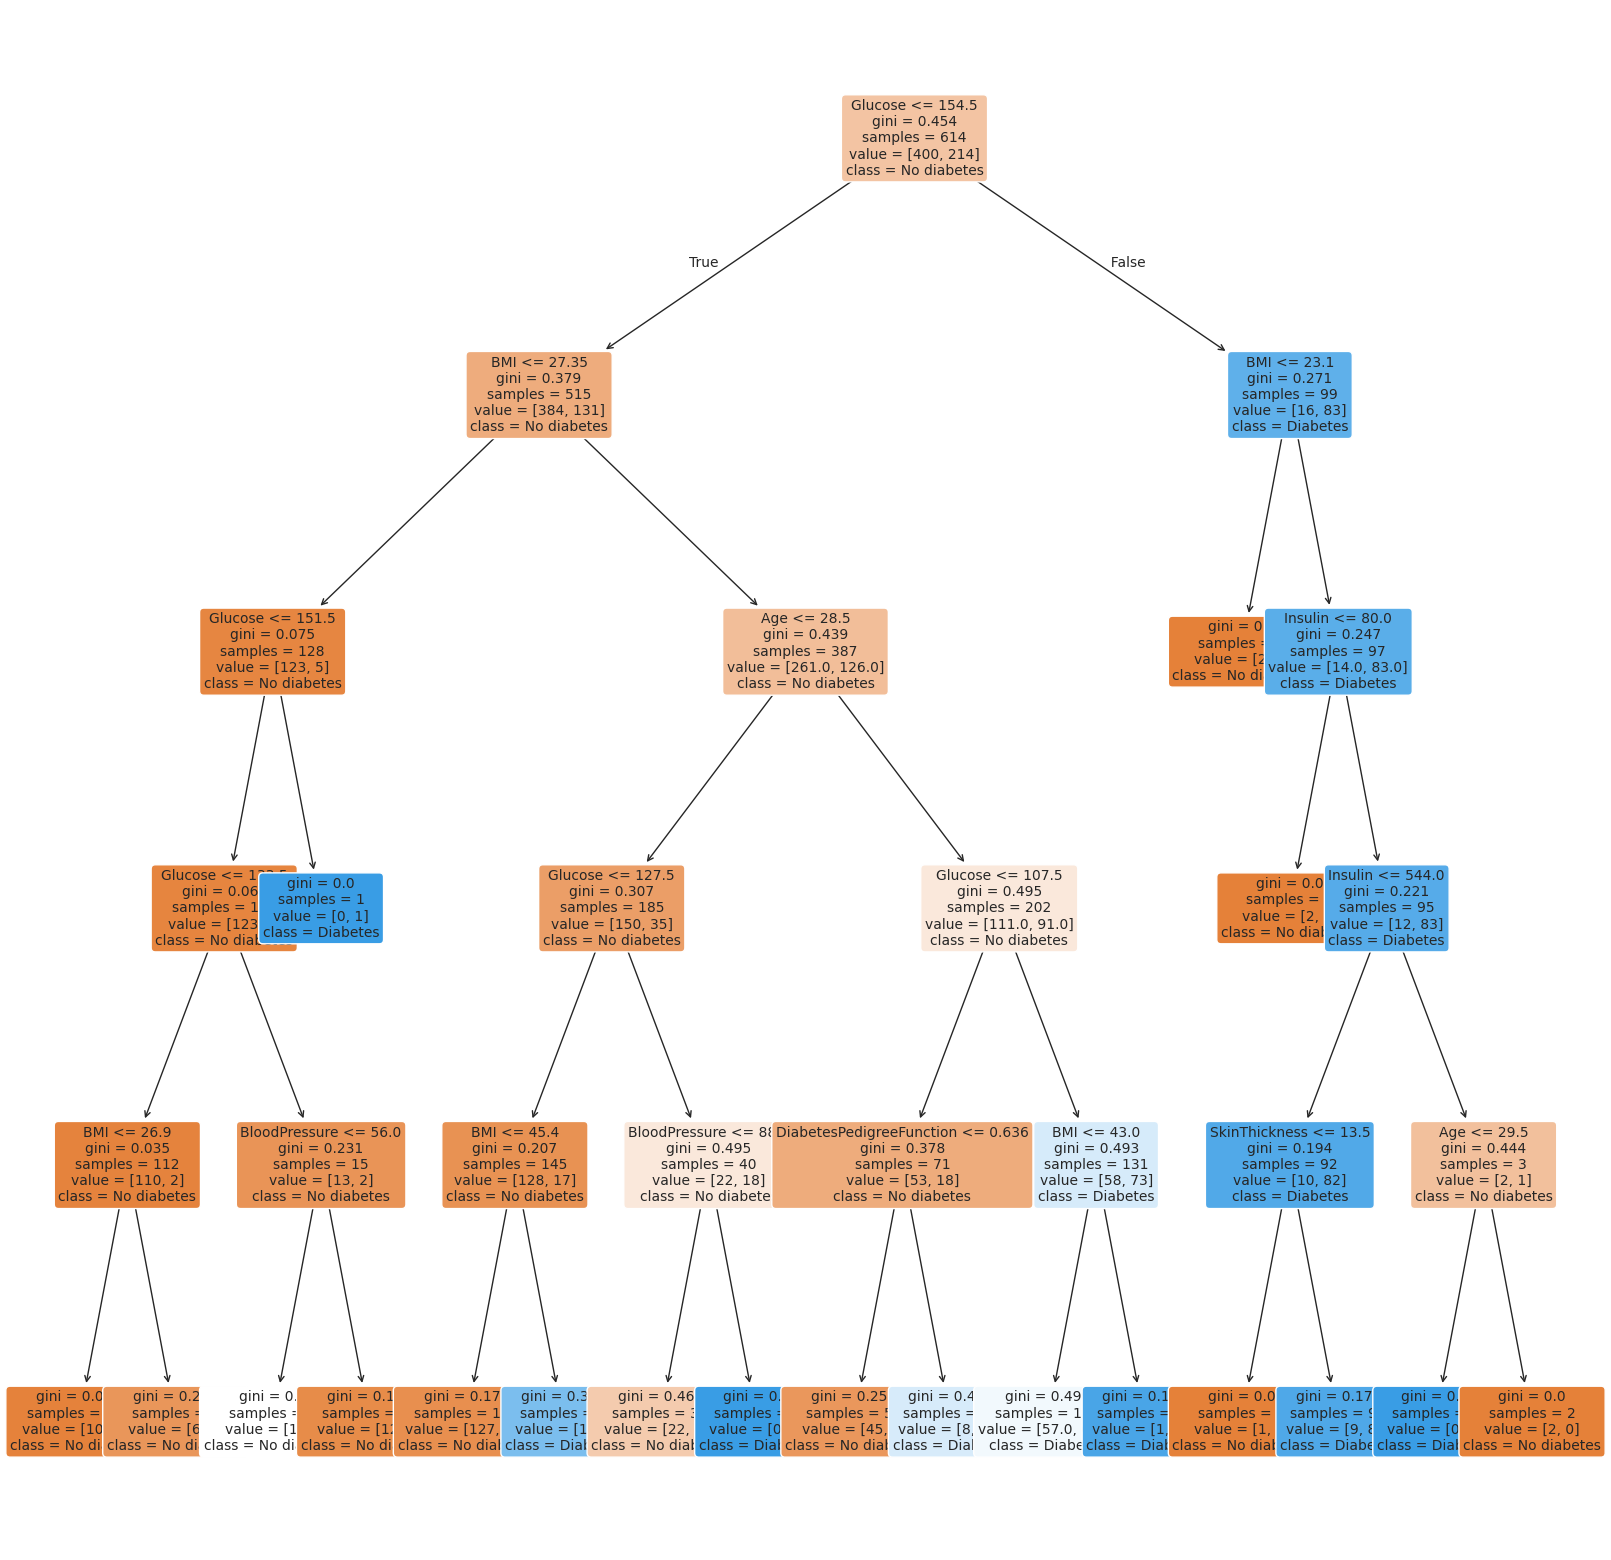

In [149]:
class_names = ["No diabetes", "Diabetes"]

fig = plt.figure(figsize=(20, 20))

tree.plot_tree(
    model,
    feature_names=list(X_train.columns),
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.show()

In [150]:
# Predicciones
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Métricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test)  # binary por defecto
f1_score_train = f1_score(y_train, y_pred_train)

precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)

recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)

# Print
print("\n=== TEST ===")
print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("\n=== TRAIN ===")
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)



=== TEST ===
Accuracy Test:  0.7792207792207793
F1 score Test:  0.7017543859649122
Precision Test:  0.6666666666666666
Recall Test:  0.7407407407407407

=== TRAIN ===
Accuracy Train:  0.8127035830618893
F1 score Train:  0.7526881720430108
Precision Train:  0.6972111553784861
Recall Train:  0.8177570093457944


In [151]:
print(classification_report(
    y_test,
    y_pred_test,
    target_names=["No diabetes", "Diabetes"]
))

              precision    recall  f1-score   support

 No diabetes       0.85      0.80      0.82       100
    Diabetes       0.67      0.74      0.70        54

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154



Comencé entrenando un árbol con profundidad elevada (max_depth=10), lo que dio lugar a un comportamiento claramente sobreajustado. Para mejorar la generalización, limité la profundidad del árbol a 5, eliminando casi todo el sobre ajuste. Las métricas de train y test parecen más alineadas ahora. El recall ha subido del 0.44 al 0.74, lo que implica una detección mucho más sólida.La F1 pasa de 0.50 a 0.70, lo que demuestra un mejor balance entre precisión y sensibilidad.


### Guardamos el modelo

In [152]:
with open("modelo_arbol_diabetes.pkl", "wb") as f:
    pickle.dump(model, f)